# READING TABULAR DATA FROM W.H.O. WEBSITE
 In this notebook we visualize the top 20 countries with the highest number of reported cases (cumulative) from this cite https://covid19.who.int/table

# IMPORT REQUIRED LIBRARIES

In [1]:
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# READ THE HTML

In [3]:
url = 'https://covid19.who.int/table'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
table = soup.find_all('div', {'role': 'row'})

In [4]:
'print(soup.prettify())'

'print(soup.prettify())'

# GET THE CONTENTS FROM THE TABLE

In [5]:
data = []
for row in table:
    cells = row.find_all('div', {'role': 'cell'})
    row_data = []
    for cell in cells:
        value = cell.text.strip().replace(',', '')
        if value.isnumeric():
            value = int(value)
        elif '.' in value:
            value = float(value)
        row_data.append(value)
    if row_data:
        data.append(row_data)

# TRANSFORM THE ITEMS TO A DATAFRAME

In [6]:
columns = ['Country', 'Total_Cases', 'New_Cases_(Past 7days)', 'Death_Cumulative', 'New_Deaths', \
           'Total_Vaccines_Administerd','FullyVaccinated','BoosterDoses']
df = pd.DataFrame(data, columns=columns)
df.head()

,Country,Total_Cases,New_Cases_(Past 7days),Death_Cumulative,New_Deaths,Total_Vaccines_Administerd,FullyVaccinated,BoosterDoses
0,+ By WHO Region,,,,,,,
1,+ By World Bank Income Group,,,,,,,
2,United States of America,102544598,126613,1114970,1741,200.82,68.72,34.99
3,China,99229372,54449,120775,227,235.52,86.82,54.7
4,India,44696984,5646,530808,24,159.89,68.99,16.57


# DATA EXPLORATION & CLEANING

## Exploration

In [7]:
df.shape

(20, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     20 non-null     object
 1   Total_Cases                 20 non-null     object
 2   New_Cases_(Past 7days)      20 non-null     object
 3   Death_Cumulative            20 non-null     object
 4   New_Deaths                  20 non-null     object
 5   Total_Vaccines_Administerd  20 non-null     object
 6   FullyVaccinated             20 non-null     object
 7   BoosterDoses                20 non-null     object
dtypes: object(8)
memory usage: 1.4+ KB


## Cleaning Data

In [9]:
#drop first two rows
df=df.iloc[2:,:]

# change empty cells to numper nan values
df.replace('',np.nan, inplace=True)

# Change the data types 
df['Total_Cases']=df["Total_Cases"].astype('int')
df['New_Cases_(Past 7days)']=df["New_Cases_(Past 7days)"].astype('float')
df['Death_Cumulative']=df["Death_Cumulative"].astype('int')
df['New_Deaths']=df["New_Deaths"].astype('float')
df['Total_Vaccines_Administerd']=df["Total_Vaccines_Administerd"].astype('float') 
df['FullyVaccinated']=df["FullyVaccinated"].astype('int')
df['BoosterDoses']=df["BoosterDoses"].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 2 to 19
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     18 non-null     object 
 1   Total_Cases                 18 non-null     int32  
 2   New_Cases_(Past 7days)      14 non-null     float64
 3   Death_Cumulative            18 non-null     int32  
 4   New_Deaths                  12 non-null     float64
 5   Total_Vaccines_Administerd  17 non-null     float64
 6   FullyVaccinated             18 non-null     int32  
 7   BoosterDoses                16 non-null     float64
dtypes: float64(4), int32(3), object(1)
memory usage: 1.0+ KB


In [30]:
df.describe() #include="all"

,Total_Cases,New_Cases_(Past 7days),Death_Cumulative,New_Deaths,Total_Vaccines_Administerd,FullyVaccinated,BoosterDoses
count,1.800000e+01,14.00000,1.800000e+01,12.000000,17.000000,18.000000,16.000000
mean,3.206541e+07,34830.50000,2.379386e+05,273.250000,227.868824,75.555556,53.456250
std,2.763720e+07,37032.13744,2.842926e+05,471.307876,41.965915,9.300362,15.510272
min,7.580858e+06,93.00000,1.944700e+04,24.000000,127.700000,54.000000,16.570000
25%,1.209114e+07,5706.25000,8.048800e+04,62.000000,207.400000,68.250000,48.025000
50%,2.504997e+07,24696.00000,1.377815e+05,137.000000,235.520000,78.500000,56.180000
75%,3.801646e+07,51368.50000,2.042345e+05,239.750000,251.900000,82.750000,63.415000
max,1.025446e+08,126613.00000,1.114970e+06,1741.000000,301.910000,88.000000,75.300000


# Visualising the Data

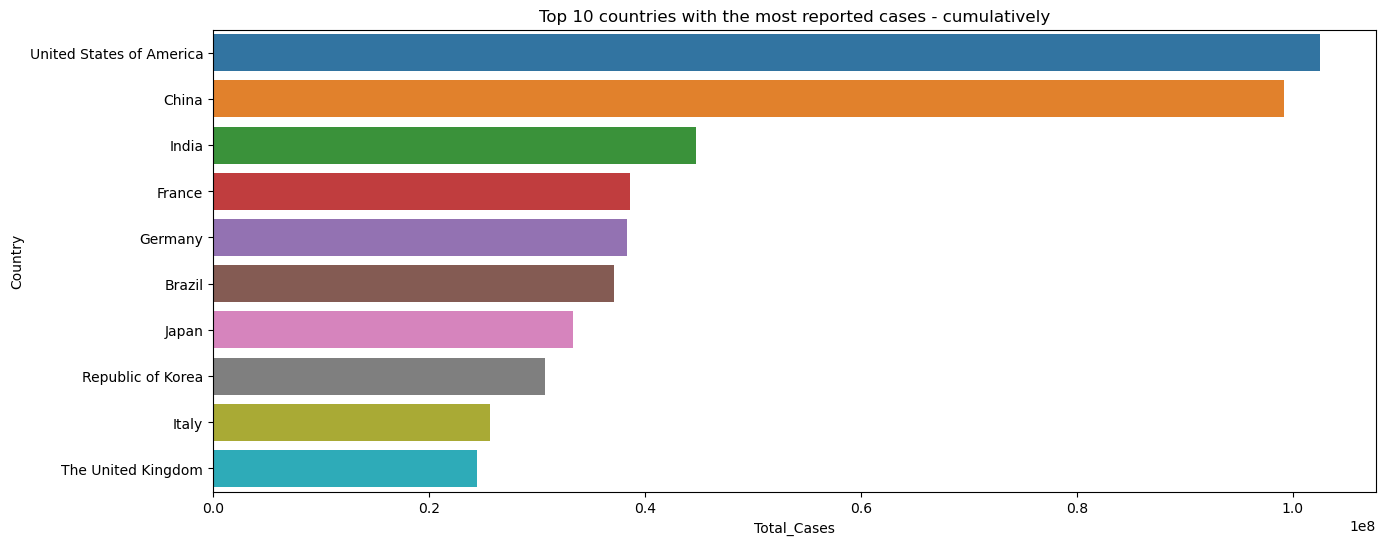

In [13]:
# Top 10 countries with the most reported cases-cumulatively
plt.figure(figsize=(15,6))
sns.barplot(y="Country",x="Total_Cases",data=df.iloc[:10,:],orient='h')
plt.title("Top 10 countries with the most reported cases - cumulatively")
plt.show()

<Figure size 1500x600 with 0 Axes>

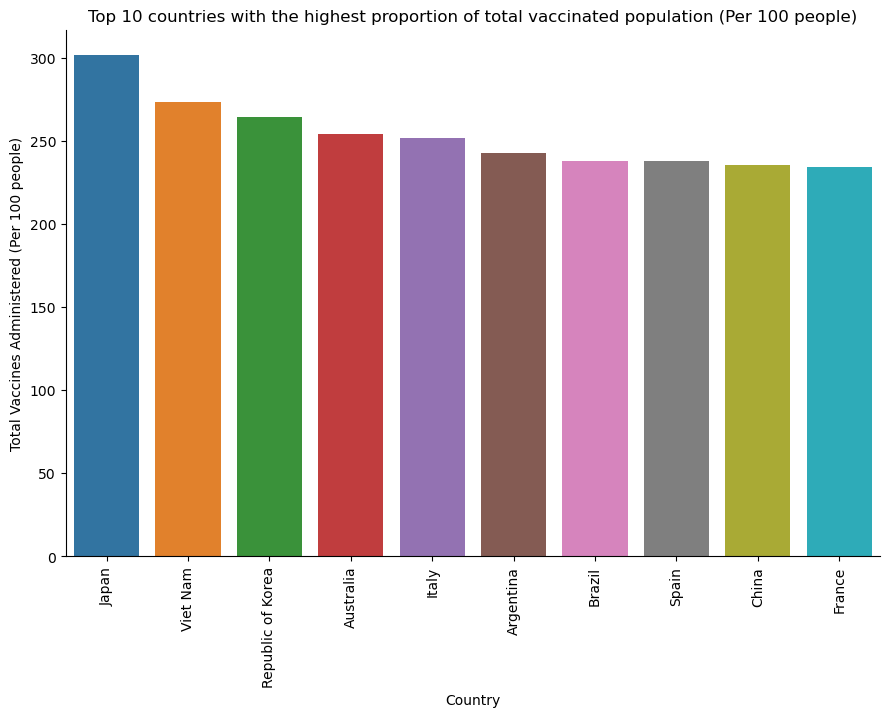

In [20]:
df2 = df.sort_values(by="Total_Vaccines_Administerd", ascending=False).iloc[:10,:]
plt.figure(figsize=(15,6))
sns.catplot(x="Country", y="Total_Vaccines_Administerd", data=df2, kind="bar", height=6, aspect=1.5)
plt.title("Top 10 countries with the highest proportion of total vaccinated population (Per 100 people)")
plt.xlabel("Country")
plt.ylabel("Total Vaccines Administered (Per 100 people)")
plt.xticks(rotation=90)
plt.show()

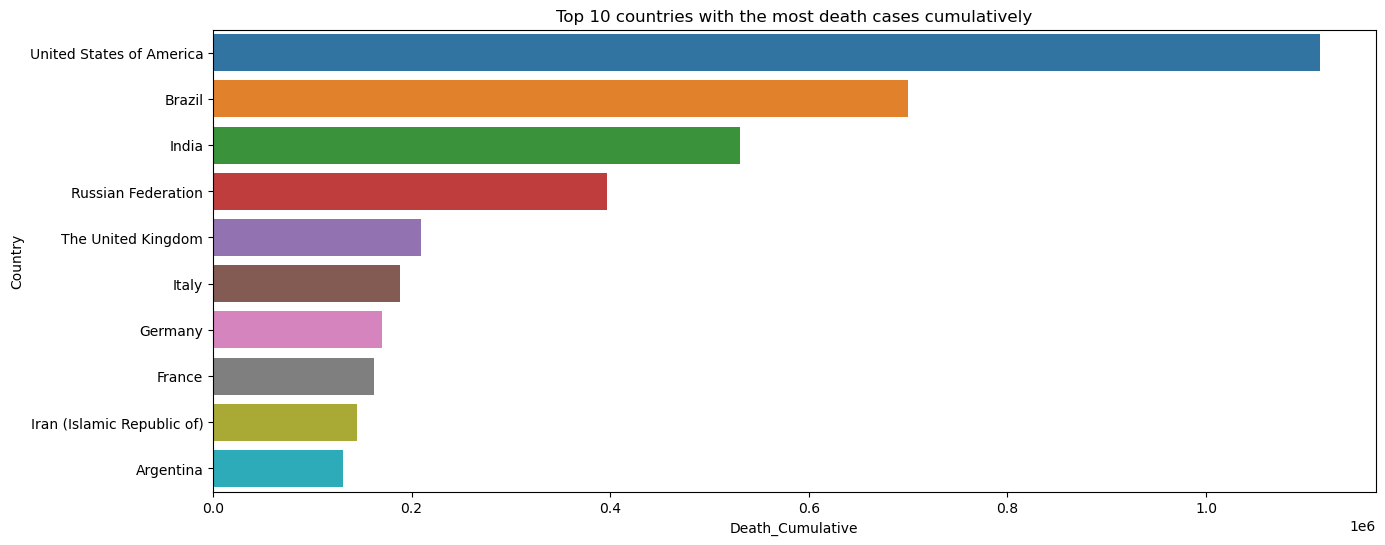

In [14]:
# Top 10 countries with the most cumulated death cases
df2=df.sort_values(by="Death_Cumulative",ascending=False).iloc[:10,:]
plt.figure(figsize=(15,6))
sns.barplot(y="Country",x="Death_Cumulative",data=df2,orient='h')
plt.title("Top 10 countries with the most death cases cumulatively")
plt.show()

<Figure size 1500x500 with 0 Axes>

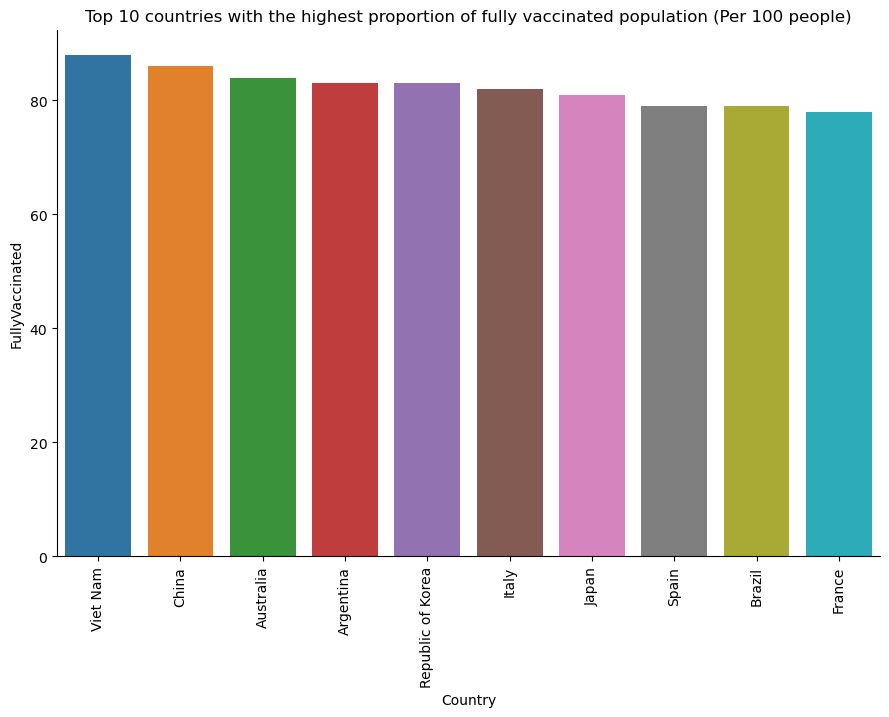

In [29]:
# Top 10 countries with the highest proportion of fully vaccinated population (Per 100 people)
df2=df.sort_values(by="FullyVaccinated",ascending=False).iloc[:10,:]
plt.figure(figsize=(15,5))
sns.catplot(x="Country",y="FullyVaccinated", data=df2, kind="bar", height=6, aspect=1.5)
plt.title("Top 10 countries with the highest proportion of fully vaccinated population (Per 100 people)")
plt.xticks(rotation=90)
plt.show()

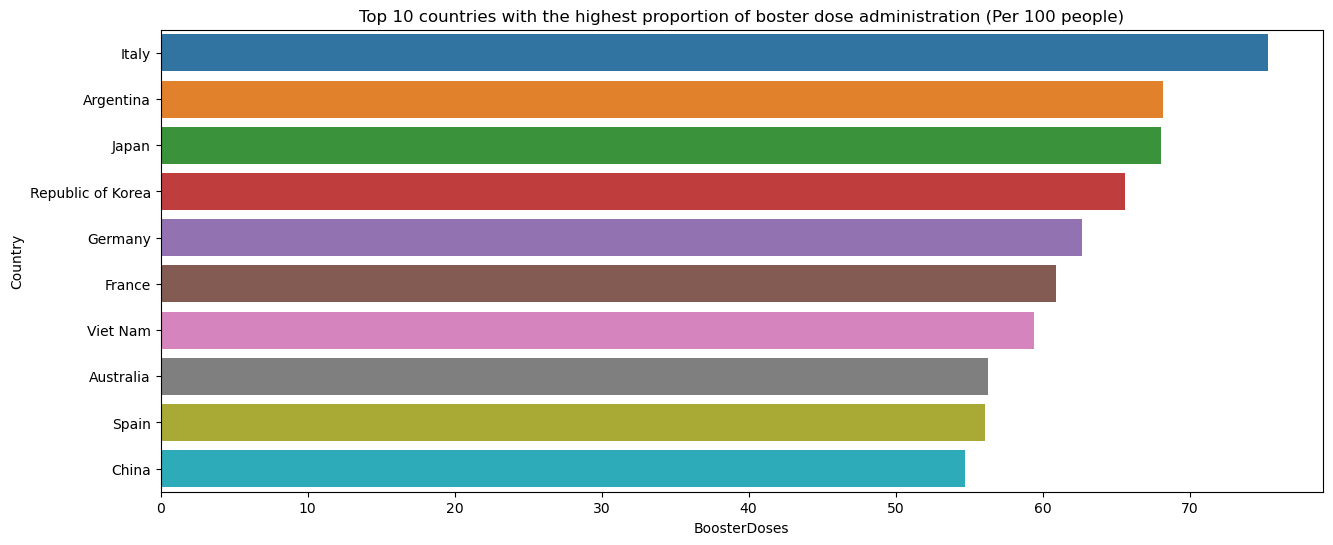

In [328]:
# Top 10 countries with the highest proportion of boster dose administration (Per 100 people)
df2=df.sort_values(by="BoosterDoses",ascending=False).iloc[:10,:]
plt.figure(figsize=(15,6))
sns.barplot(y="Country",x="BoosterDoses",data=df2,orient='h')
plt.title("Top 10 countries with the highest proportion of boster dose administration (Per 100 people)")
plt.show()